<a href="https://colab.research.google.com/github/cdbm/F1DataAnalysis/blob/master/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
circuits=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/circuits.csv")
constructor_results=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/constructor_results.csv")
constructor_standings=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/constructor_standings.csv")
constructors=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/constructors.csv")
driver_standings=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/driver_standings.csv")
drivers=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/drivers.csv")
lap_times=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/lap_times.csv")
pit_stops=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/pit_stops.csv")
qualifying=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/qualifying.csv")
races=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/races.csv")
results=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/results.csv")
seasons=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/seasons.csv")
status=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/status.csv")



# Circuitos


In [3]:
circuits['circuitRef'] = circuits['circuitRef'].astype('category')
circuits['name'] = circuits['name'].astype('category')
circuits['location'] = circuits['location'].astype('category')
circuits['country'] = circuits['country'].astype('category')
circuits['alt'] = circuits['alt'].astype('category')

Descrição dos dados:

circuitId: categórico nominal <br/>
circuitRef: categórico nominal<br/>
name: categórico nominal<br/>
location: categórico nominal<br/>
country: categórico nominal<br/>
lat: Contínuo<br/>
lng: Contínuo<br/>
alt: categórico nominal </br>
url: categórico nominal <br/>


In [4]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipedia.org/wiki/Istanbul_Park


In [5]:
circuits.dtypes

circuitId        int64
circuitRef    category
name          category
location      category
country       category
lat            float64
lng            float64
alt           category
url             object
dtype: object

In [6]:
circuits['country'].cat.categories

Index(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Belgium',
       'Brazil', 'Canada', 'China', 'France', 'Germany', 'Hungary', 'India',
       'Italy', 'Japan', 'Korea', 'Malaysia', 'Mexico', 'Monaco', 'Morocco',
       'Netherlands', 'Portugal', 'Russia', 'Singapore', 'South Africa',
       'Spain', 'Sweden', 'Switzerland', 'Turkey', 'UAE', 'UK', 'USA',
       'Vietnam'],
      dtype='object')

Localização dos ciruitos no mapa


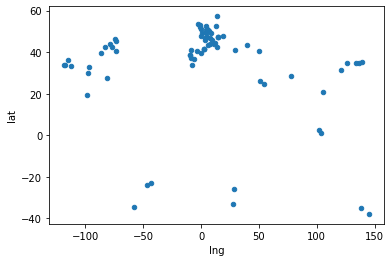

In [7]:
circuits.plot.scatter(x='lng', y='lat')

Países com mais circuitos

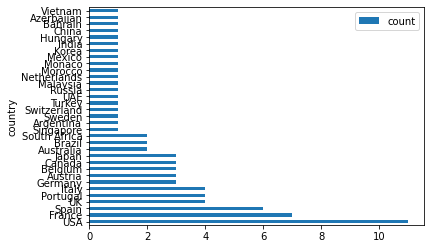

In [8]:
circuits.groupby(['country']).agg(['count'])["circuitId"].sort_values(by='count', ascending=False).plot.barh()

# Construtores


In [9]:
constructors['constructorRef'] = constructors['constructorRef'].astype('category')
constructors['name'] = constructors['name'].astype('category')
constructors['nationality'] = constructors['nationality'].astype('category')

Descrição dos dados:

constructorId: categórico nominal <br/>
name: categórico nominal<br/>
nationality: categórico nominal<br/>



In [10]:
constructors.dtypes

constructorId        int64
constructorRef    category
name              category
nationality       category
url                 object
dtype: object

In [70]:
constructors[constructors["name"] == "Red Bull"]

,constructorId,constructorRef,name,nationality,url
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing


Países com mais equipes

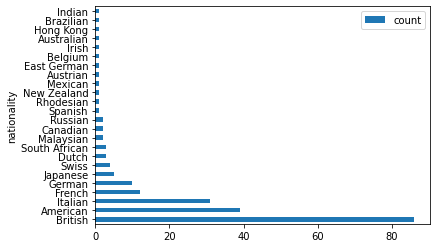

In [12]:
constructors.groupby(['nationality']).agg(['count'])['constructorRef'].sort_values(by='count', ascending=False).plot.barh()

# Resultados Construtores


Descrição dos dados </br>
status: categórico binário


In [13]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [14]:
constructor_results.dtypes

constructorResultsId      int64
raceId                    int64
constructorId             int64
points                  float64
status                   object
dtype: object

In [15]:
constructor_results["status"] = constructor_results["status"].astype("category")

In [16]:
constructor_results["status"].cat.categories

Index(['D', '\N'], dtype='object')

# Construtores Standings


Descrção dos dados </br>
positionText: categórico nomimal


In [17]:
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [18]:
constructor_standings["positionText"] = constructor_standings["positionText"].astype("category")

In [19]:
constructor_standings["positionText"].cat.categories

Index(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '3', '4', '5', '6', '7', '8', '9', 'E'],
      dtype='object')

In [20]:
constructor_standings.dtypes

constructorStandingsId       int64
raceId                       int64
constructorId                int64
points                     float64
position                     int64
positionText              category
wins                         int64
dtype: object

# Desempenho Construtores

In [21]:
constructor_standings['positionText'] = constructor_standings['positionText'].astype('category')

In [ ]:
constructor_standings.dtypes

In [ ]:
constructor_standings.head()

Análise de desempenho da ferrari durante os anos

In [ ]:
ferrari_standings=constructor_standings[constructor_standings.constructorId == 6]
ferrari_standings.sort_values(by="raceId")
ferrari_standings.describe()

In [ ]:
ferrari_standings["year"] = ferrari_standings.raceId.map(races.set_index("raceId")["year"])
ferrari_2019 = ferrari_standings[ferrari_standings.year == 2019]
ferrari_by_year = ferrari_standings.groupby(["year"]).agg("max")["points"]
ferrari_by_year

In [ ]:
ferrari_by_year

Filtro na ferrari para comparar com red bull

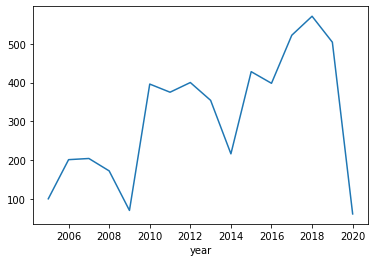

In [98]:
ferrari_from_2005 = ferrari_standings[ferrari_standings.year >= 2005]
ferrari_from_2005 = ferrari_from_2005.groupby(["year"]).agg("max")["points"]
ferrari_from_2005.plot()

Análise de pountuação da Red Bull ao longo dos anos

In [ ]:
rbr_standings=constructor_standings[constructor_standings.constructorId == 9]
rbr_standings.sort_values(by="raceId")
rbr_standings.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


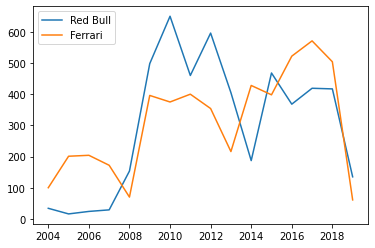

In [120]:
rbr_standings["year"] = rbr_standings.raceId.map(races.set_index("raceId")["year"])
rbr_year_2019 = rbr_standings[rbr_standings.year == 2019]
rbr_by_year = rbr_standings.groupby(["year"]).agg("max")["points"]
plt.plot(np.arange(2004, 2020,1) ,rbr_by_year, label="Red Bull")
plt.plot(np.arange(2004, 2020,1),ferrari_from_2005, label="Ferrari")
plt.legend()
plt.show()

# Pilotos


In [ ]:
drivers.head()

Descrição dos tipos <br>
nationality: categórico nominal


In [ ]:
drivers["nationality"] = drivers["nationality"].astype("category")

In [ ]:
drivers["nationality"].cat.categories

In [ ]:
drivers.dtypes

# Pilotos Standings


Descrção dos dados </br>
positionText: categórico nomimal

In [ ]:
driver_standings.head()

In [ ]:
driver_standings["positionText"] = driver_standings["positionText"].astype("category") 

In [ ]:
driver_standings["positionText"].cat.categories

In [ ]:
driver_standings.dtypes

# Tempos de Voltas

In [ ]:
lap_times.head()

In [ ]:
lap_times.dtypes

#Pit Stops


In [ ]:
pit_stops.head()

In [ ]:
pit_stops.dtypes

# Qualificação


In [ ]:
qualifying.head()

In [ ]:
qualifying.dtypes

# Corridas

Descrição dos dados </br>
name: categórico nominal


In [ ]:
races.head()

In [ ]:
races["name"] = races["name"].astype("category")

In [ ]:
races["name"].cat.categories

In [ ]:
races.dtypes

#Resultados


In [ ]:
results.head()

In [ ]:
results["positionText"] = results["positionText"].astype("category")

In [ ]:
results.dtypes

In [ ]:
results["positionText"].cat.categories

#Temporadas


In [ ]:
seasons.head()